In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%cd {HOME}/yolov7/seg
!pip install --upgrade pip
!pip install -r requirements.txt

/content/yolov7/seg
  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
from getpass import getpass

# copy your API KEY from
api_key = getpass('Enter YOUR_API_KEY secret value: ')

Enter YOUR_API_KEY secret value: ··········


In [ ]:
%cd {HOME}/yolov7/seg

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key=api_key)
project = rf.workspace("university-bswxt").project("crack-bphdr")
dataset = project.version(2).download("yolov7")

/content/yolov7/seg
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to crack-2 in yolov7pytorch:: 100%|██████████| 8070/8070 [00:01<00:00, 6225.27it/s]


In [ ]:
%cd {HOME}/yolov7/seg
!python segment/train.py --batch 16 \
 --epochs 10 \
 --data {dataset.location}/data.yaml \
 --weights $WEIGHTS_PATH \
 --device 0 \
 --name custom

/content/yolov7/seg
2024-09-24 17:40:46.715430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 17:40:46.756791: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 17:40:46.766853: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 17:40:46.790369: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 17:40:48.071436: W ten

In [ ]:
%cd {HOME}/yolov7/seg
!python segment/predict.py \
--weights /content/best.pt\
--conf 0.25 \
--source /content/yolov7/crack_img_2.jpeg



#In place of crack_img_2 you can take any example image.

#I also uploaded the final weights of final model you can directly predict using them.

#%cd {HOME}/yolov7/seg
#!python segment/predict.py \
#--weights /content/best_new.pt\
#--conf 0.25 \
#--source /content/yolov7/crack_img_2.jpeg


/content/yolov7/seg
YOLOv5 🚀 2024-9-24 Python-3.10.12 torch-2.4.1+cu121 CPU

/content/yolov7/seg/models/experimental.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckp

In [ ]:
pip install opencv-python-headless numpy


In [ ]:

#Code for changing the red color segmented crack image to black color segmented crack image
import cv2
import numpy as np

# Load the image
image_path = '/content/yolov7/seg/runs/predict-seg/exp6/1675.rf.e3aa3f8d28d0247ef0284dd46dacc29f.jpg'
image = cv2.imread(image_path)

# Convert image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the red color range in HSV
# Adjust these ranges if needed
lower_red1 = np.array([0, 70, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 70, 50])
upper_red2 = np.array([180, 255, 255])

# Create masks for red color
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Optional: Smooth the mask to remove noise
kernel = np.ones((3, 3), np.uint8)
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_OPEN, kernel)
red_mask = cv2.morphologyEx(red_mask, cv2.MORPH_CLOSE, kernel)

# Create an inverse mask for red boundaries
inverse_red_mask = cv2.bitwise_not(red_mask)

# Remove the red boundaries
image_no_boundaries = cv2.bitwise_and(image, image, mask=inverse_red_mask)

# Optionally preserve the segmentation part by adding the segmented regions
# Assuming the segmentation part is in a separate mask (segmented_mask)
# segmented_mask = cv2.imread('path/to/segmentation_mask.png', cv2.IMREAD_GRAYSCALE)

# Ensure segmented_mask has the same dimensions as the image
# segmented_mask_resized = cv2.resize(segmented_mask, (image.shape[1], image.shape[0]))

# Merge the segmented part back
# final_image = cv2.bitwise_or(image_no_boundaries, cv2.bitwise_and(image, image, mask=segmented_mask_resized))

# Show the result
#cv2.imshow('Image without Red Boundaries', image_no_boundaries)

# Save the result if needed
cv2.imwrite('/content/exp_7.png', image_no_boundaries)


True

In [ ]:
#final code pixels
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/exp_4.png', cv2.IMREAD_GRAYSCALE)

# Define the black color threshold
# Here, 0 is considered pure black; adjust the threshold if needed
threshold_value = 1  # Consider pixels with a value < 1 as black

# Create a binary mask where black pixels are 1, and others are 0
_, black_mask = cv2.threshold(image, threshold_value, 1, cv2.THRESH_BINARY_INV)

# Count the black pixels
num_black_pixels = np.sum(black_mask)
print(f"Number of black pixels: {num_black_pixels}")


Number of black pixels: 3116


In [ ]:

#final code for black for black and other all white
from PIL import Image

# Load the image
image_path = '/content/exp_4.png'  # Replace with your image path
image = Image.open(image_path)

# Convert image to RGB mode if it's not already
image = image.convert('RGB')

# Create a new image with the same size and white background
new_image = Image.new('RGB', image.size, (255, 255, 255))

# Get pixel data
pixels = image.load()
new_pixels = new_image.load()

# Iterate through each pixel
for y in range(image.size[1]):
    for x in range(image.size[0]):
        if pixels[x, y] == (0, 0, 0):
            new_pixels[x, y] = (0, 0, 0)  # Set to black
        else:
            new_pixels[x, y] = (255, 255, 255)  # Set to white

# Save the new image
new_image_path = 'output_image.png'  # Replace with desired output path
new_image.save(new_image_path)

print("Image processing completed. The new image is saved at:", new_image_path)


Image processing completed. The new image is saved at: output_image.png


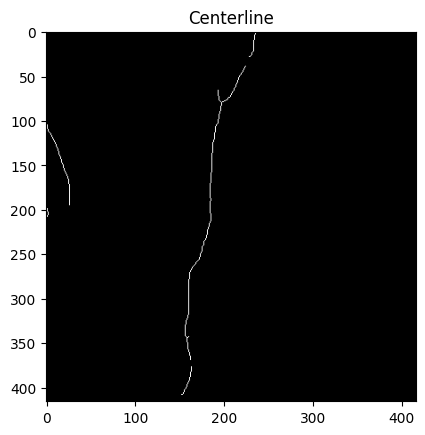

Crack thickness map in pixels: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


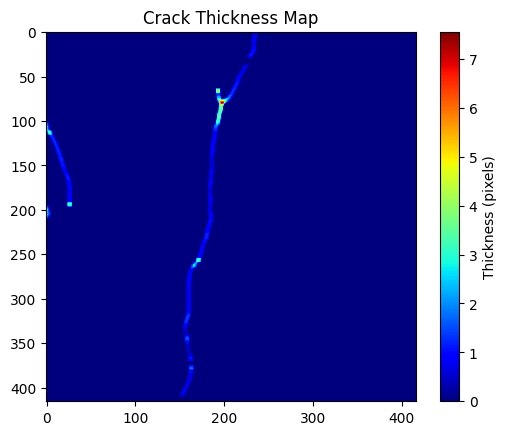

In [ ]:
#final code for width

import cv2
import numpy as np
from skimage.morphology import skeletonize
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt

def extract_centerline(binary_image):

    binary_image = binary_image / 255
    centerline = skeletonize(binary_image)


    plt.imshow(centerline, cmap='gray')
    plt.title('Centerline')
    plt.show()


    cv2.imwrite('centerline_image.png', centerline.astype(np.uint8) * 255)

    return centerline

def find_tangential_orientation(centerline):

    sobelx = cv2.Sobel(centerline.astype(np.float32), cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(centerline.astype(np.float32), cv2.CV_64F, 0, 1, ksize=5)
    orientations = np.arctan2(sobely, sobelx)
    return orientations

def estimate_thickness_orientation(tangential_orientation):

    return tangential_orientation + np.pi / 2

def compute_thickness_map(centerline, binary_image, tangential_orientation):


    thickness_map = np.zeros_like(centerline, dtype=np.float32)

    thickness_orientation = estimate_thickness_orientation(tangential_orientation)

    binary_image = binary_image // 255

    rows, cols = np.nonzero(centerline)
    for r, c in zip(rows, cols):
        angle = thickness_orientation[r, c]
        dr, dc = np.sin(angle), np.cos(angle)
        thickness_positive = 0
        thickness_negative = 0

        # Trace in the positive direction along the thickness orientation
        step = 0
        while True:
            rr = int(r + step * dr)
            cc = int(c + step * dc)
            if rr < 0 or rr >= binary_image.shape[0] or cc < 0 or cc >= binary_image.shape[1]:
                break
            if binary_image[rr, cc] == 0:  # Hit a boundary
                break
            thickness_positive = step
            step += 1

        # Trace in the negative direction along the thickness orientation
        step = 0
        while True:
            rr = int(r - step * dr)
            cc = int(c - step * dc)
            if rr < 0 or rr >= binary_image.shape[0] or cc < 0 or cc >= binary_image.shape[1]:
                break
            if binary_image[rr, cc] == 0:  # Hit a boundary
                break
            thickness_negative = step
            step += 1


        thickness_map[r, c] = thickness_positive + thickness_negative

    return thickness_map




def average_thickness(thickness_map, neighborhood_size=5):

    kernel = np.ones((neighborhood_size, neighborhood_size)) / (neighborhood_size ** 2)
    return cv2.filter2D(thickness_map, -1, kernel)

def crack_quantification(crack_image):


    binary_image = cv2.threshold(crack_image, 127, 255, cv2.THRESH_BINARY_INV)[1]
    centerline = extract_centerline(binary_image)
    tangential_orientation = find_tangential_orientation(centerline)
    thickness_orientation = estimate_thickness_orientation(tangential_orientation)
    thickness_map = compute_thickness_map(centerline, binary_image,thickness_orientation)
    averaged_thickness = average_thickness(thickness_map)

    return averaged_thickness


crack_image = cv2.imread('/content/yolov7/seg/output_image.png', cv2.IMREAD_GRAYSCALE)
thickness_map = crack_quantification(crack_image)
print("Crack thickness map in pixels:", thickness_map)


plt.imshow(thickness_map, cmap='jet')
plt.colorbar(label='Thickness (pixels)')
plt.title('Crack Thickness Map')
plt.show()


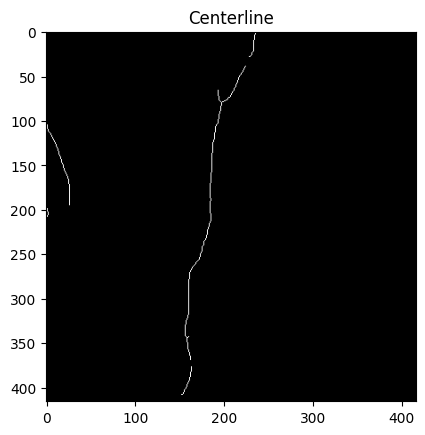

Crack Length: 36645.32884905016 pixels


In [ ]:
#final code for length
import cv2
import numpy as np
from skimage.morphology import skeletonize
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

def extract_centerline(binary_image):
    """Extract the centerline using morphological thinning (skeletonization)."""
    binary_image = binary_image / 255  # Normalize the binary image to 0s and 1s
    centerline = skeletonize(binary_image)

    # Display the centerline image
    plt.imshow(centerline, cmap='gray')
    plt.title('Centerline')
    plt.show()

    return centerline

def calculate_crack_length(centerline):
    """Calculate the length of the crack based on the centerline."""
    # Get the coordinates of non-zero (centerline) points
    points = np.column_stack(np.nonzero(centerline))

    # Initialize crack length
    crack_length = 0.0

    # Calculate Euclidean distance between consecutive points
    for i in range(1, len(points)):
        crack_length += euclidean(points[i-1], points[i])

    return crack_length

def crack_length_quantification(crack_image):
    """Full quantification process for crack length."""
    # Convert to binary (assuming cracks are black on white background)
    binary_image = cv2.threshold(crack_image, 127, 255, cv2.THRESH_BINARY_INV)[1]

    # Step 1: Extract the centerline
    centerline = extract_centerline(binary_image)

    # Step 2: Calculate the crack length
    crack_length = calculate_crack_length(centerline)

    return crack_length

# Example usage
crack_image = cv2.imread('/content/yolov7/seg/output_image.png', cv2.IMREAD_GRAYSCALE)
crack_length = crack_length_quantification(crack_image)
print(f"Crack Length: {crack_length} pixels")
